<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/4_Transformada_Laplace/1_Definicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada de Laplace

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Definición

- La [trasnformada de Laplace](https://en.wikipedia.org/wiki/Laplace_transform) es una transformada integral desde la función exponencial compleja $e^{s t}$ como base de transformación.

- Convierte una señal compleja $x(t) \in \mathbb{C}$ con variable independiente real $t \in \mathbb{R}$ en su transformada compleja de Laplace $X(s) \in \mathbb{C}$ con variable independiente compleja $s \in \mathbb{C}$.

- La transformada de Laplace recibe su nombre en honor a [Pierre-Simon Laplace](https://en.wikipedia.org/wiki/Pierre-Simon_Laplace).

- Las funciones exponenciales complejas constituyen autofunciones de sistemas lineales e invariantes en el tiempo (SLIT). Por eso, la transformada de Laplace es utilizada en el contexto de señales y SLIT.

### Transformada Bilateral de Laplace

- La transformada bilateral de Laplace se define como
\begin{equation}
X(s) = \int_{-\infty}^{\infty} x(t) \, e^{- s t} \; dt
\end{equation}
donde $X(s) = \mathfrak{L} \{ x(t)\}$ es la transformada de Laplace de $x(t)$.

- Una señal compleja $x(t) \in \mathbb{C}$ con variable independiente real $t \in \mathbb{R}$ se representa por sus transformada compleja de Laplace $X(s) \in \mathbb{C}$ con variable independiente compleja $s \in \mathbb{C}$.

- La variable $s$ se puede interpretar como la frecuencia compleja  $s = \sigma + j \omega$ con $\sigma, \omega \in \mathbb{R}$.


- La existencia de la transformada de Laplace $X(s) = \mathfrak{L} \{ x(t) \}$ depende de la frecuencia compleja $s$ y la señal $x(t)$. Todos los valores para los cuales la transformada de Laplace converge forman la [*region de convergencia*](https://en.wikipedia.org/wiki/Radius_of_convergence) (ROC).

- La transformada de Laplace de dos señales diferentes pueden tener diferentes ROC. Por ello, la ROC necesita ser especificada para una inversión única de la transformada de Laplace.

### Transformada Unilateral de Laplace

- Las señales causales juegan un rol importante en la teoría de señales y sistemas.

- Para $x(t) = 0$ si $t <0$, la relación $x(t) = x(t) \cdot \epsilon(t)$ se cumple. Empleando esta definición en la transformada bilateral de Laplace se obtiene que:

\begin{equation}
X(s) = \int_{-\infty}^{\infty} x(t) \cdot \epsilon(t) \, e^{- s t} \; dt = \int_{0}^{\infty} x(t) \, e^{- s t} \; dt
\end{equation}

- La anterior igualdad, se define como la transformada unilateral de Laplace:

\begin{equation}
X(s) = \int_{0}^{\infty} x(t) \, e^{- s t} \; dt
\end{equation}

- En la literatura ambas transformadas de Laplace (unilateral y bilateral) son denominadas como transformada de Laplace, y obtienen el mismo resultado para señales causales.

### Transformada de un Impulso de Dirac

- La transformada de Laplace de un impulso de Dirac $\mathfrak{L} \{ \delta(t) \}$ se obtiene al reemplazar $\delta(t)$ en la definición de la transfromada bilateral de Laplace y utilizar la propiedad de selectividad de la función Delta:

\begin{equation}
\mathfrak{L} \{ \delta(t) \} = \int_{-\infty}^{\infty} \delta(t) \, e^{- s t} dt = e^{- s t} \Big\vert_{t=0}  =  1
\end{equation}
para $s \in \mathbb{C}$. La ROC cubre todo el plano complejo.

- La transformada de un impulso de Dirac centrado en cero es uno. Por lo tanto, todas las frecuencias complejas $s$ tienen el mismo factor de escala. Esta es una propiedad importante en la teoría de señales y sistemas, debido a que el impulso de Dirac es utilizado para caracterizar un SLIT mediante su respuesta al impulso $h(t) = \mathsf{H} \{ \delta(t) \}$.

**Ejemplo**

La transformada de Laplace de un impulso de Dirac se puede obtener utilizando `SymPy` para evaluar la integral de transformación.

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing() #importar sympy y declarar variables simbólicas

t = sym.symbols('t', real=True)
s = sym.symbols('s', complex=True)
#integral transformada de laplace
X = sym.integrate(sym.DiracDelta(t)*sym.exp(-s*t), (t, -sym.oo, sym.oo))
X

### Transformada de una señal exponencial compleja causal

La transformada $X(s) = \mathfrak{L} \{ x(t) \}$ de una señal exponencial compleja causal:

\begin{equation}
x(t) = \epsilon(t) \cdot e^{-s_0 t}
\end{equation}
con frecuencia compleja $s_0 \in \mathbb{C}$, se obtiene al evaluar la transformada unilateral de Laplace:

\begin{equation}
\begin{split}
X(s) &= \int_{0}^{\infty} e^{-s_0 t} \cdot e^{-s t} \; dt = \frac{-e^{-(s+s_0)t}}{s+s_0} \, \bigg\vert_{0}^{\infty} = \frac{-1}{s+s_0} \left[ \lim_{t \to \infty} \left( e^{- (s+s_0) t} \right) -1 \right] \\
&= \frac{1}{s + s_0}
\end{split}
\end{equation}

Se puede concluir que para el límite anterior, la transformada de Laplace converge si y solo si $\Re \{ s + s_0 \} > 0$. Por lo tanto, la ROC es:

\begin{equation}
\Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

Combinando ambas expresiones, la transformada de una señal exponencial compleja causal es:

\begin{equation}
\mathfrak{L} \{ \epsilon(t) \cdot e^{-s_0 t} \} = \frac{1}{s + s_0} \quad \text{; para } \Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

**Ejemplo - Transformada de una señal exponencial**

En `SymPy`, la [transformada de Laplace](http://docs.sympy.org/latest/modules/integrals/integrals.html?highlight=laplace#sympy.integrals.transforms.laplace_transform) es la transformada unilateral. La respectiva función de `SymPy`es utilizada en este ejemplo para calcular la transformada de una señal exponencial causal.

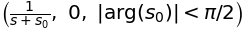

In [ ]:
s0 = sym.symbols('s0', complex=True)
#utilizamos la función de transformada de Laplace de sympy
X, a, cond = sym.laplace_transform(sym.exp(-s0*t), t, s)
X, a, cond

La función regresa tres resultados:

- El primero es $X(s)$.
- El segundo es la región de convergencia para el que $\Re \{ s \} > a$.
- El tercero representa una condición auxiliar de convergencia respecto a la fase de la expresión.

### Transformada de una señal Heaviside

La transformada de Laplace de una señal Heaviside (escalón unitario) se obtiene cuando en la señal $\epsilon(t) \cdot e^{-s_0 t}$ se hace $s_0 = 0$

\begin{equation}
\mathfrak{L} \{ \epsilon(t) \} = \frac{1}{s} \qquad \text{; para } \Re \{ s \} > 0
\end{equation}

## Convergencia

Una condición suficiente pero no necesaria para la existencia de la transformada de Laplace $X(s) = \mathfrak{L} \{ x(t) \}$ de una señal $x(t)$ es:

\begin{equation}
\int_{-\infty}^{\infty} | x(t) \cdot e^{- \sigma t} | \; dt < \infty
\end{equation}

Donde $\sigma = \Re\{ s \}$ es la parte real de la frecuencia compleja $s = \sigma + j \omega$ de la transformada de Laplace. Formalmente, la señal $x(t)$ debe ser entonces una [función localmente integrable](https://en.wikipedia.org/wiki/Locally_integrable_function).

La parte imaginaria $\omega = \Im \{ s \}$ de la frecuencia $s$ no afecta en el análisis de la convergencia.

Consecuentemente, la ROC se determina unicamente por la parte real $\sigma = \Re\{ s \}$.

Para una señal con $x(t) = 0$ para $t < T_0$, la ROC está dada por la forma $\Re \{ s \} > a$ con $a \in \mathbb{R}$. Lo anterior puede ser concluido gracias al decaimiento del término exponencial $e^{- \sigma t}$ para $t \to \infty$, el cual asegura la convergencia para un valor dado de $a$. Sin embargo, este razonamiento es válido solo para señales con [crecimiento exponencial](https://en.wikipedia.org/wiki/Exponential_growth).

El mismo razonamiento permite encontrar las ROC de señales con $x(t) = 0$ para $t > T_0$ y bilaterales. Las ROC resultantes se muestran en la siguiente imágen.

![Region of convergence for left-/two-/right-sided signal](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/ROC.png?raw=1)

Las áreas grises muestran el valor de $s$ para los cuales la transformada de Laplace converge.

Las fronteras $a$ de estas áreas dependen de la señal $x(t)$.

## Representación

- La transformada de Laplace $X(s) = \mathfrak{L} \{ x(t) \}$ depende de la frecuencia compleja $s \in \mathbb{C}$ y en general $X(s) \in \mathbb{C}$. Lo anterior puede ser ilustrado al graficar la magnitud $|X(s)|$ y la fase $\varphi (s)$, la parte real $\Re \{ X(s) \}$ e imaginaria $\Im \{ X(s) \}$ en el plano complejo $s$. A menudo, los gráficos en 3-D no son muy ilustrativos.

- Muchas transformadas de Laplace de interés en la teoría de señales y sistemas son [funciones racionales](https://en.wikipedia.org/wiki/Rational_function) en $s$.

- Los polinomios del numerado y del denominador pueden ser representados mediante sus [raices](https://en.wikipedia.org/wiki/Zero_of_a_function#Polynomial_roots) complejas y un factor constante.

- Las raices del numerador son llamadas *ceros* mientras que las raices del denominador son llamadas *polos* de $X(s)$. Las representaciones polinomiales y de ceros y polos son equivalentes:

\begin{equation}
X(s) = \frac{\sum_{m=0}^{M} \beta_m s^m}{\sum_{n=0}^{N} \alpha_n s^n} = K \cdot \frac{\prod_{\mu=0}^{Q} (s - s_{0 \mu})}{\prod_{\nu=0}^{P} (s - s_{\infty \nu})}
\end{equation}
donde $M$ y $N$ son el orden de los polinomios del numerador y denominador respectivamente, $s_{0 \mu}$ representa el $\mu$-th cero y $s_{\infty \nu}$ el $\nu$-th polo de $X(s)$, $Q = M-1$ y $P = N-1$ son el número total de ceros y polos respectivamente.

- Para $M=N$ el factor $K = \frac{\beta_M}{\alpha_N}$. Si $M > N$, hay por lo menos un polo ubicado en $|s| = \infty$.

- Es común ilustrar los polos y los ceros en un [gráfico de polos y ceros](https://en.wikipedia.org/wiki/Pole%E2%80%93zero_plot), donde la ubicación de los polos y ceros complejos, sus ángulos y el factor $K$ son graficados en el plano $s$:

![Ilustración de los polos y ceros en un gráfico de polos y ceros](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/pz_plot.png?raw=1)

- Las ubicaciones de los polos y ceros proporcionan información sobre la composición de una señal. Por ejemplo, la transformada de Laplace de una señal exponencial compleja tiene un polo en $s = - s_0$.

- Una señal que se compone de una superposición de señales exponenciales complejas tendrá múltiples polos cuyas posiciones están relacionadas con las frecuencias complejas de las que se compone.

**Ejercicio**

* Obtenga $X(s)$ junto con su ROC de la anterior gráfica de polos y ceros.

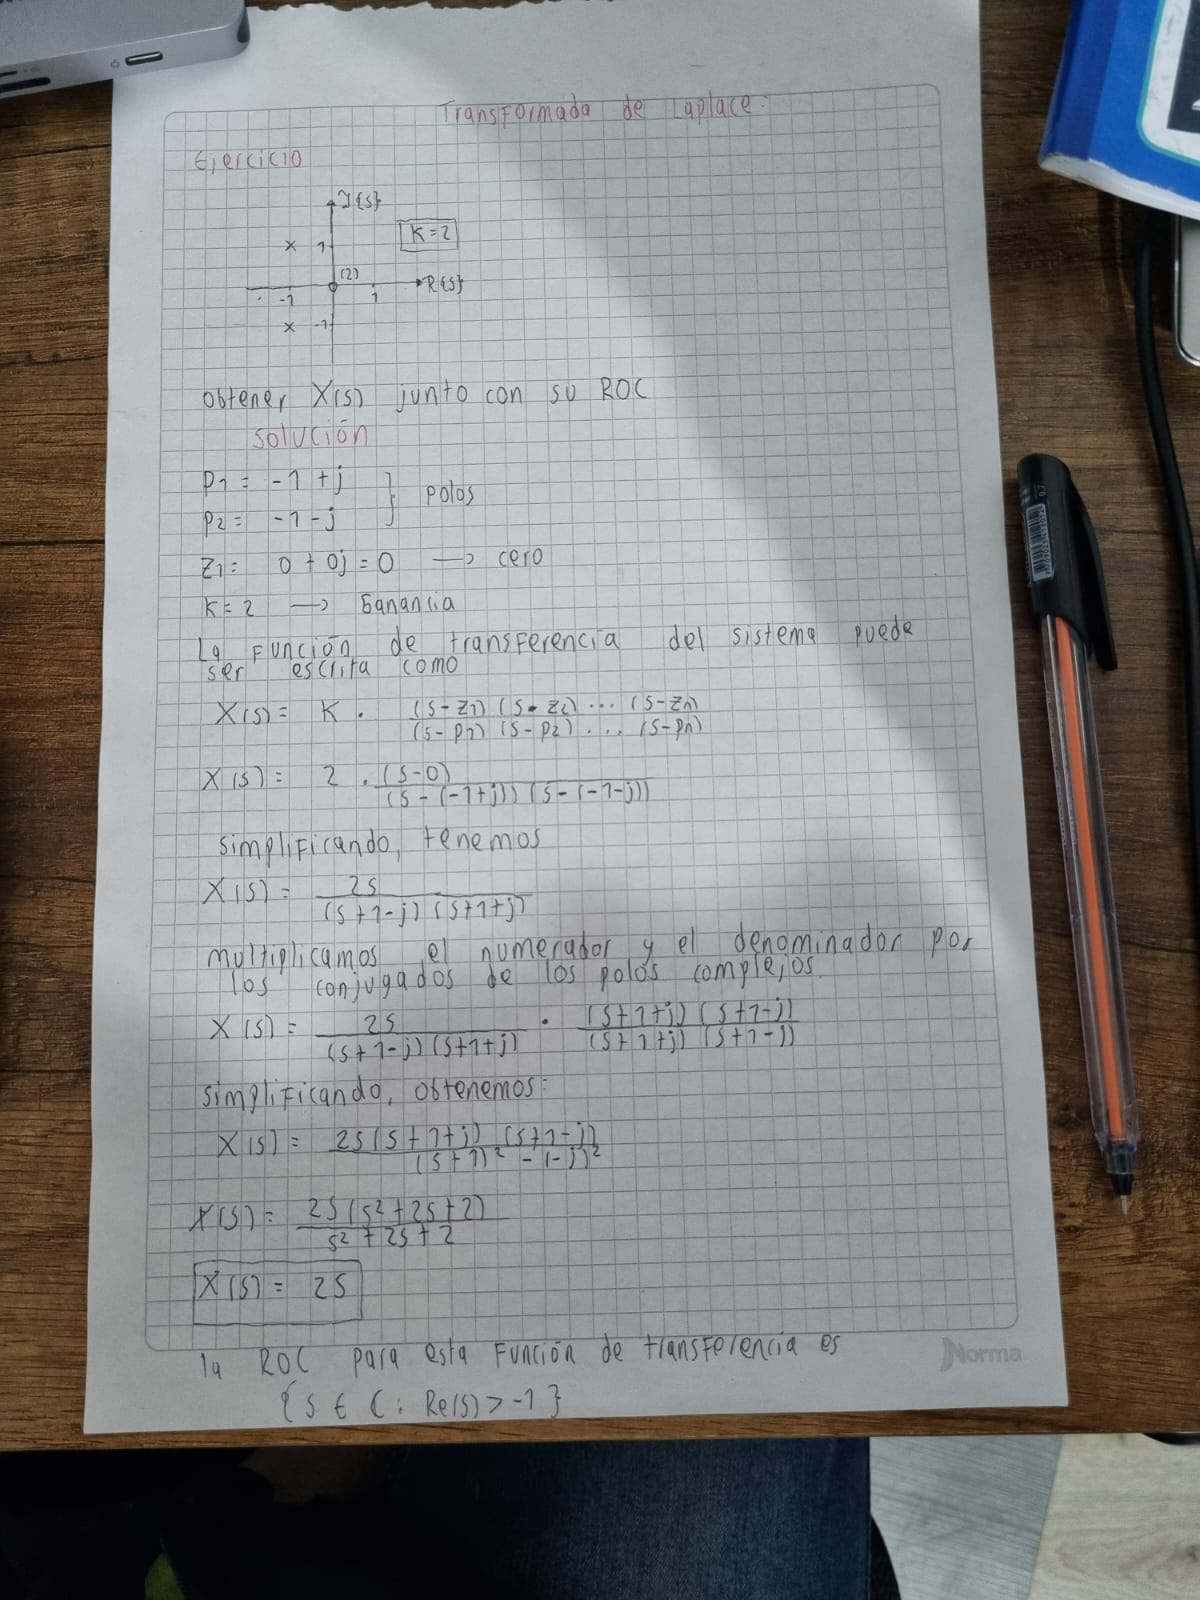

**Ejemplo - Ilustración de la transformada de Laplace de una señal exponencial causal**

La transformada de Laplace de una señal exponencial compleja causal:

\begin{equation}
X(s) = \frac{1}{s + s_0} \qquad \text{for } \Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

es ilustrada en el gráfico de su magnitud $|X(s)|$ en el  plano $s$ con $s = \sigma + j \omega$ para $s_0 = 1 + j$.

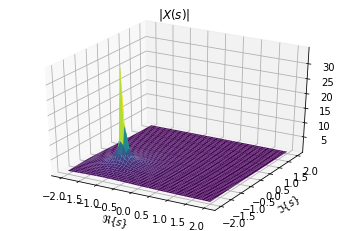

In [ ]:
sigma, omega = sym.symbols('sigma omega') #declarar variables simbólicas y expresión de la transformada

X = 1/(s + s0)
X1 = X.subs({s: sigma+sym.I*omega, s0: 1+sym.I})
#gráfico en 3D
sym.plotting.plot3d(abs(X1), (sigma, -2, 2), (omega, -2, 2),
                    xlabel=r'$\Re\{s\}$', ylabel=r'$\Im\{s\}$', title=r'$|X(s)|$');

Alternativamente, la transformada de Laplace es ilustrada en un gráfica de polos y ceros.

Primero los polos.

In [ ]:
poles = sym.roots(sym.denom(X), s) #se obtienen la raices del denominador
poles

y los ceros

In [ ]:
zeros = sym.roots(sym.numer(X), s) #raíces del numerador
zeros

Los anteriores diccionarios están compuestos de polos y ceros, y sus respectivos ángulos.

Para ilustrar la localización de polos y ceros en el plano $s$, hay una función definida para gráficos de polos y ceros utilizando la librería de Python [`matplotlib`](http://matplotlib.org/).

In [ ]:
import matplotlib.pyplot as plt

def pole_zero_plot(poles, zeros, ax=None):

    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)

    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)

    plt.axis([-2, 2, -2, 2])
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()

El diagrama de polos y ceros es mostrado para $s_0 = 1 + j$

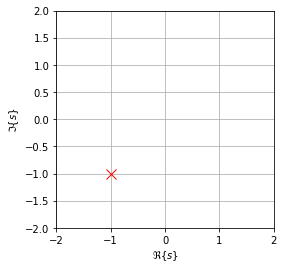

In [ ]:
X2 = X.subs(s0, 1+sym.I)
pole_zero_plot(sym.roots(sym.denom(X2), s), sym.roots(sym.numer(X2), s))

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.